# 병원, 의원 Preprocessing

In [1]:
# 사용할 column: 상세영업상태명, 도로명전체주소, 의료기관종별명, 진료과목내용

# ['진료과목내용명'] == '소아청소년과'만 남기기
# 병원 - ['상세영업상태명'] == '영업중'만 남기기
# 의원 - ['상세영업상태명'] == '영업중'만 남기기

In [11]:
import pandas as pd

In [31]:
# 서울시 병원, 의원 data 가져오기
hospital = pd.read_csv('[필수활용01]서울시_병원정보.csv', encoding='cp949')
clinic = pd.read_csv('[필수활용02]서울시_의원정보.csv', encoding='cp949', low_memory=False)
print(hospital.columns, '\n')
print(clinic.columns) # '시도', '소재지시도' column 없음

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '최초지정일자', '시도', '도로명시도', '소재지시도'],
      dtype='object') 

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '의료기관종별명', '의료인수', '입원실수', '병상수', '총면적', '진료과목내용', '진료과목내용명', '지정취소일자',
       '완화의료지정형태', '완화의료담당부서명', '구급차특수', '구급차일반', '총인원', '구조사수', '허가병상수',
       '

In [24]:
# 병원 종류 살펴보기
print("병원 종류별 개수")
print(hospital['의료기관종별명'].value_counts(), '\n')

# 영업중 아닌 병원 종류별 개수
print("영업중 아닌 병원 종류별 개수")
print(hospital[hospital['상세영업상태명'] != '영업중']['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", hospital['진료과목내용명'].isnull().sum(), '\n')

# 소아청소년과 병원 영업 상태 확인
pediatrics_hospital = hospital[(hospital['의료기관종별명'].isin(['병원', '한방병원', '종합병원'])) & (hospital['진료과목내용명'].str.contains('소아청소년과'))]
print("소아청소년과 병원 영업 상태")
print(pediatrics_hospital['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 병원 정보만 남기기
pediatrics_hospital = pediatrics_hospital[pediatrics_hospital['상세영업상태명'] == '영업중']

# 사용할 columns null값 확인
# columns = ['상세영업상태명', '도로명전체주소', '의료기관종별명']
# for column in columns:
#     print(column, "null 개수:", pediatrics_hospital[column].isnull().sum())

병원 종류별 개수
병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: 의료기관종별명, dtype: int64 

영업중 아닌 병원 종류별 개수
병원              86
요양병원(일반요양병원)    55
치과병원            46
한방병원            25
요양병원(노인병원)       2
요양병원(정신병원)       1
종합병원             1
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 0 

소아청소년과 병원 영업 상태
영업중     123
폐업       29
휴업        1
직권폐업      1
Name: 상세영업상태명, dtype: int64 



In [32]:
# 의원 종류 살펴보기
print("의원 종류별 개수")
print(clinic['의료기관종별명'].value_counts(), '\n')

# 영업중 아닌 의원 종류별 개수
print("영업중 아닌 의원 종류별 개수")
print(clinic[clinic['상세영업상태명'] != '영업중']['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", clinic['진료과목내용명'].isnull().sum(), '\n')

# 진료과목 null값 실제로 보기
# print(clinic[clinic['진료과목내용명'].isna()][['상세영업상태명', '의료기관종별명']], '\n')

# 진료과목 null값 포함한 행 제거
# clinic = clinic.drop(clinic[clinic['진료과목내용명'].isna()].index)
# print("진료과목 null값 제거한 의원 종류")
# print(clinic['의료기관종별명'].value_counts(), '\n') # 보건소 -1, 조산원 -4

# 소아청소년과 의원 영업 상태 확인
pediatrics_clinic = clinic[(clinic['의료기관종별명'].isin(['의원', '한의원'])) & (clinic['진료과목내용명'].str.contains('소아청소년과'))]
print(pediatrics_clinic['의료기관종별명'].value_counts())
print("소아청소년과 의원 영업 상태")
print(pediatrics_clinic['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 의원 정보만 남기기
pediatrics_clinic = pediatrics_clinic[pediatrics_clinic['상세영업상태명'] == '영업중']

# 사용할 columns(병원 columns와 동일) null값 확인
# for column in columns:
#     print(column, "null 개수:", pediatrics_hospital[column].isnull().sum())

의원 종류별 개수
의원      14338
치과의원     7019
한의원      6036
보건소        25
보건지소       12
조산원         9
Name: 의료기관종별명, dtype: int64 

영업중 아닌 의원 종류별 개수
의원      4879
한의원     2410
치과의원    2137
조산원        6
Name: 의료기관종별명, dtype: int64 

진료과목내용명 null 개수: 5 

의원    4227
Name: 의료기관종별명, dtype: int64
소아청소년과 의원 영업 상태
영업중     3047
폐업      1174
직권폐업       3
휴업         3
Name: 상세영업상태명, dtype: int64 



# 병원, 의원, 미세먼지 EDA

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="Malgun Gothic")

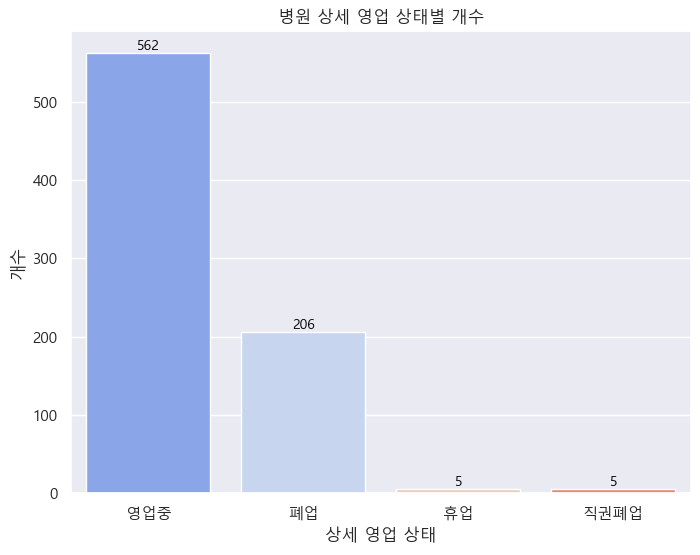

In [7]:
counts = hospital['상세영업상태명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=hospital['상세영업상태명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('병원 상세 영업 상태별 개수')
plt.xlabel('상세 영업 상태')
plt.ylabel('개수')
plt.show()

<Figure size 1000x600 with 0 Axes>

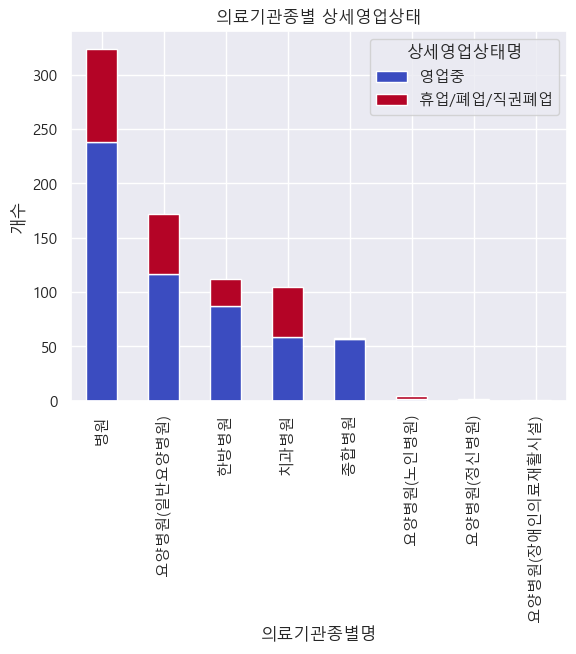

In [8]:
hospital['상세영업상태명'] = hospital['상세영업상태명'].replace({'휴업': '휴업/폐업/직권폐업', '폐업': '휴업/폐업/직권폐업', '직권폐업': '휴업/폐업/직권폐업'})

# 의료기관종별명과 상세영업상태명에 대한 Crosstab 생성
cross_table = pd.crosstab(hospital['의료기관종별명'], hospital['상세영업상태명'])

# 각 카테고리의 합계를 계산하고 크기 순으로 정렬
order = cross_table.sum(axis=1).sort_values(ascending=False).index

# 정렬된 순서로 데이터프레임 재배열
cross_table_sorted = cross_table.loc[order]

# stacked bar plot 그리기
plt.figure(figsize=(10, 6))
cross_table_sorted.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('의료기관종별 상세영업상태')
plt.xlabel('의료기관종별명')
plt.ylabel('개수')

plt.show()


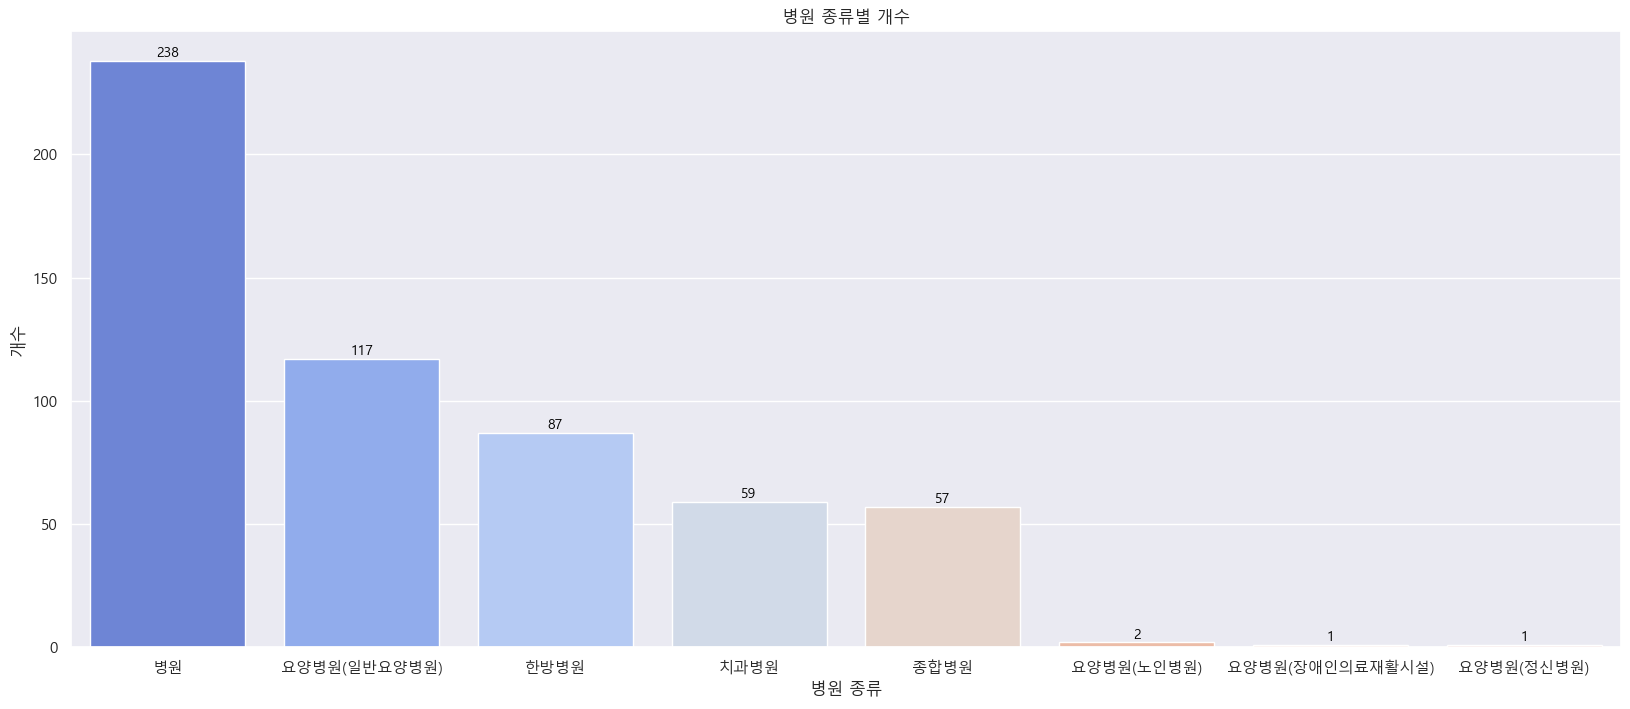

In [30]:
hospital = hospital[hospital['상세영업상태명'] == '영업중']
counts = hospital['의료기관종별명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
ax = sns.countplot(x=hospital['의료기관종별명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('병원 종류별 개수')
plt.xlabel('병원 종류')
plt.ylabel('개수')
plt.show()

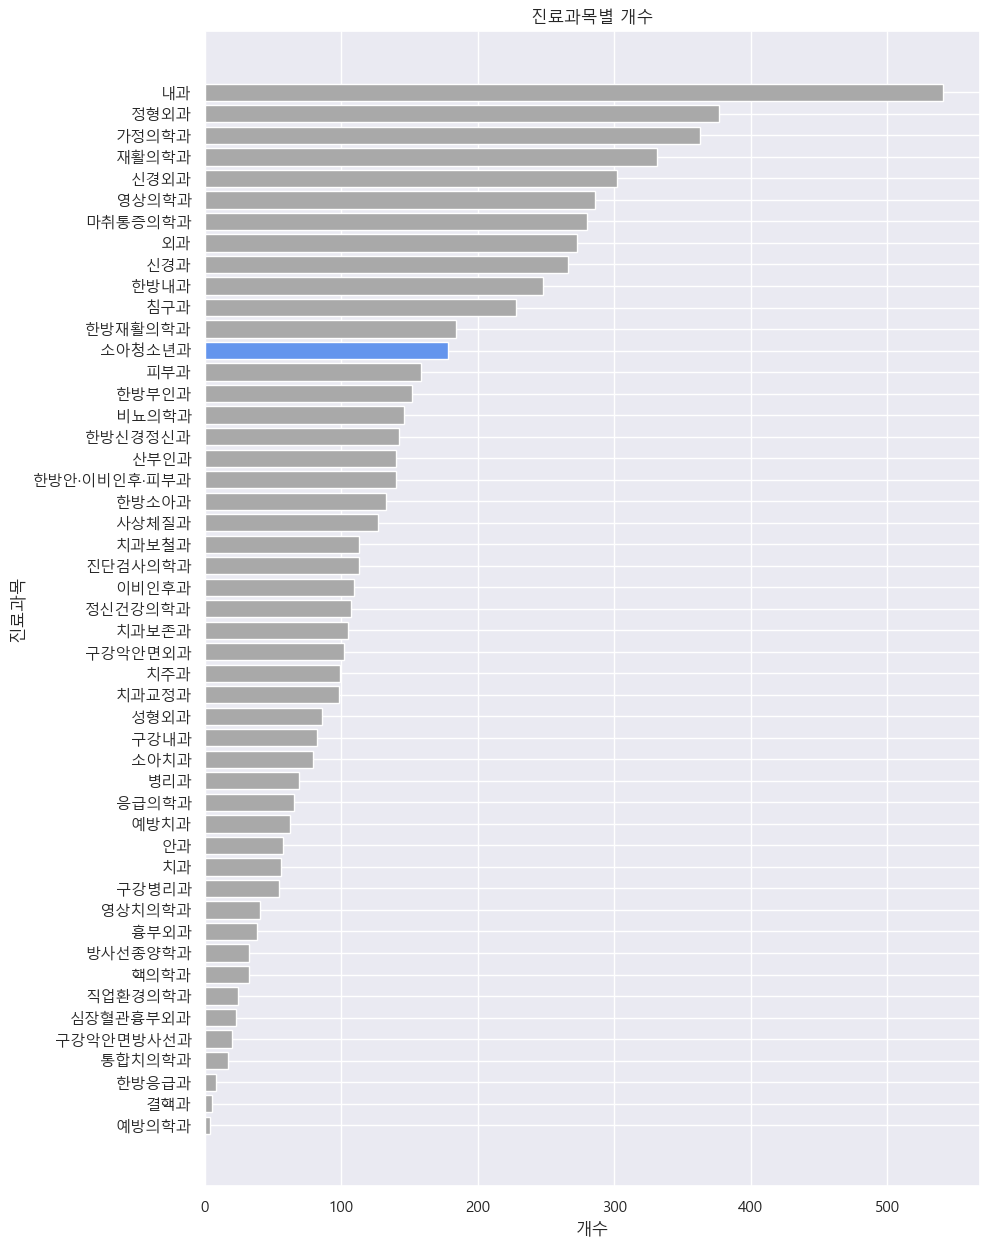

In [29]:
departments = hospital['진료과목내용명'].str.split(', ', expand=True).stack()
departments.reset_index(drop=True, inplace=True)

counts = departments.value_counts().sort_values(ascending=True)

colors = ['darkgray' if dep != '소아청소년과' else 'cornflowerblue' for dep in counts.index]

plt.figure(figsize=(10, 15))  # 세로 막대로 변경

plt.barh(counts.index, counts, color=colors)  # barh를 사용하여 세로 막대 그리기
plt.title('진료과목별 개수')
plt.xlabel('개수')
plt.ylabel('진료과목')
plt.show()

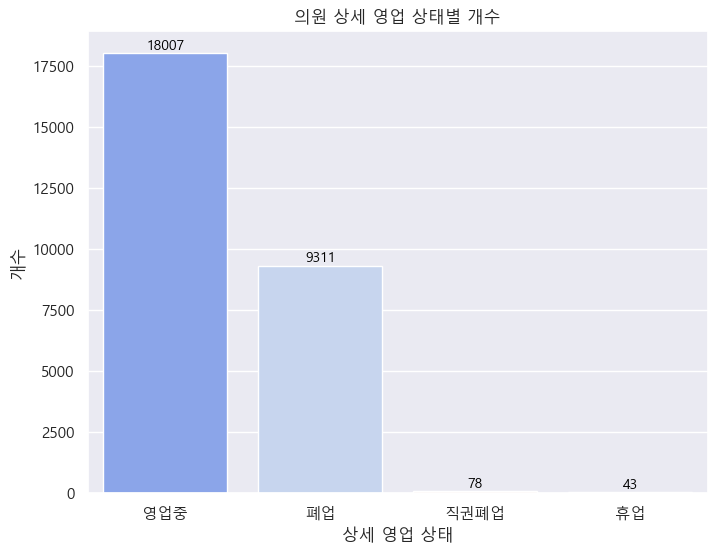

In [33]:
counts = clinic['상세영업상태명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=clinic['상세영업상태명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('의원 상세 영업 상태별 개수')
plt.xlabel('상세 영업 상태')
plt.ylabel('개수')
plt.show()

<Figure size 1000x600 with 0 Axes>

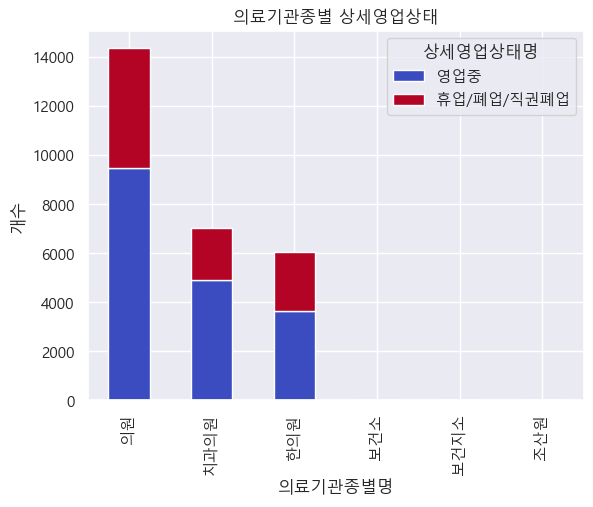

In [34]:
clinic['상세영업상태명'] = clinic['상세영업상태명'].replace({'휴업': '휴업/폐업/직권폐업', '폐업': '휴업/폐업/직권폐업', '직권폐업': '휴업/폐업/직권폐업'})

# 의료기관종별명과 상세영업상태명에 대한 Crosstab 생성
cross_table = pd.crosstab(clinic['의료기관종별명'], clinic['상세영업상태명'])

# 각 카테고리의 합계를 계산하고 크기 순으로 정렬
order = cross_table.sum(axis=1).sort_values(ascending=False).index

# 정렬된 순서로 데이터프레임 재배열
cross_table_sorted = cross_table.loc[order]

# stacked bar plot 그리기
plt.figure(figsize=(10, 6))
cross_table_sorted.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('의료기관종별 상세영업상태')
plt.xlabel('의료기관종별명')
plt.ylabel('개수')

plt.show()


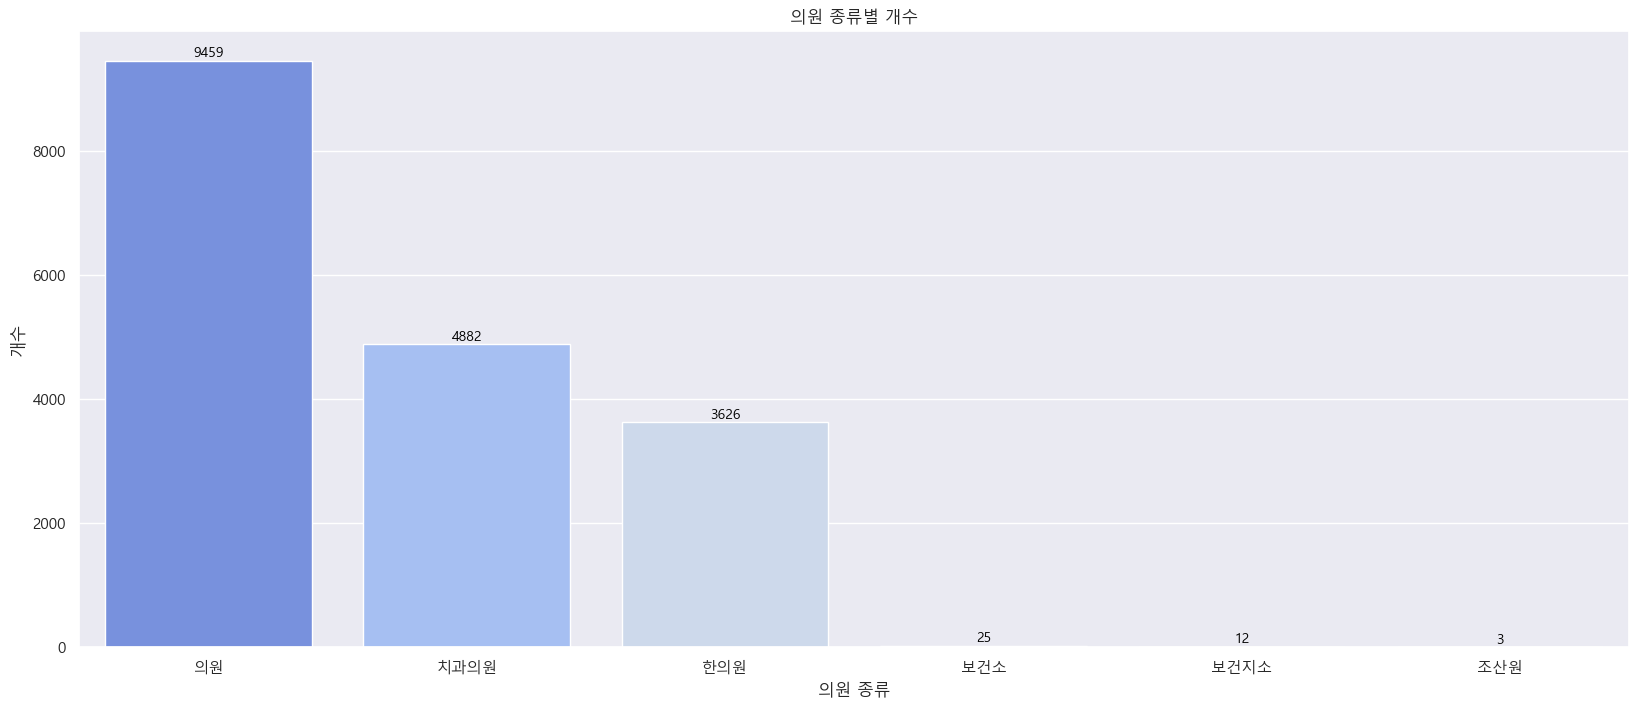

In [36]:
clinic = clinic[clinic['상세영업상태명'] == '영업중']
counts = clinic['의료기관종별명'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20, 8))
ax = sns.countplot(x=clinic['의료기관종별명'], order=counts.index, palette="coolwarm")

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('의원 종류별 개수')
plt.xlabel('의원 종류')
plt.ylabel('개수')
plt.show()

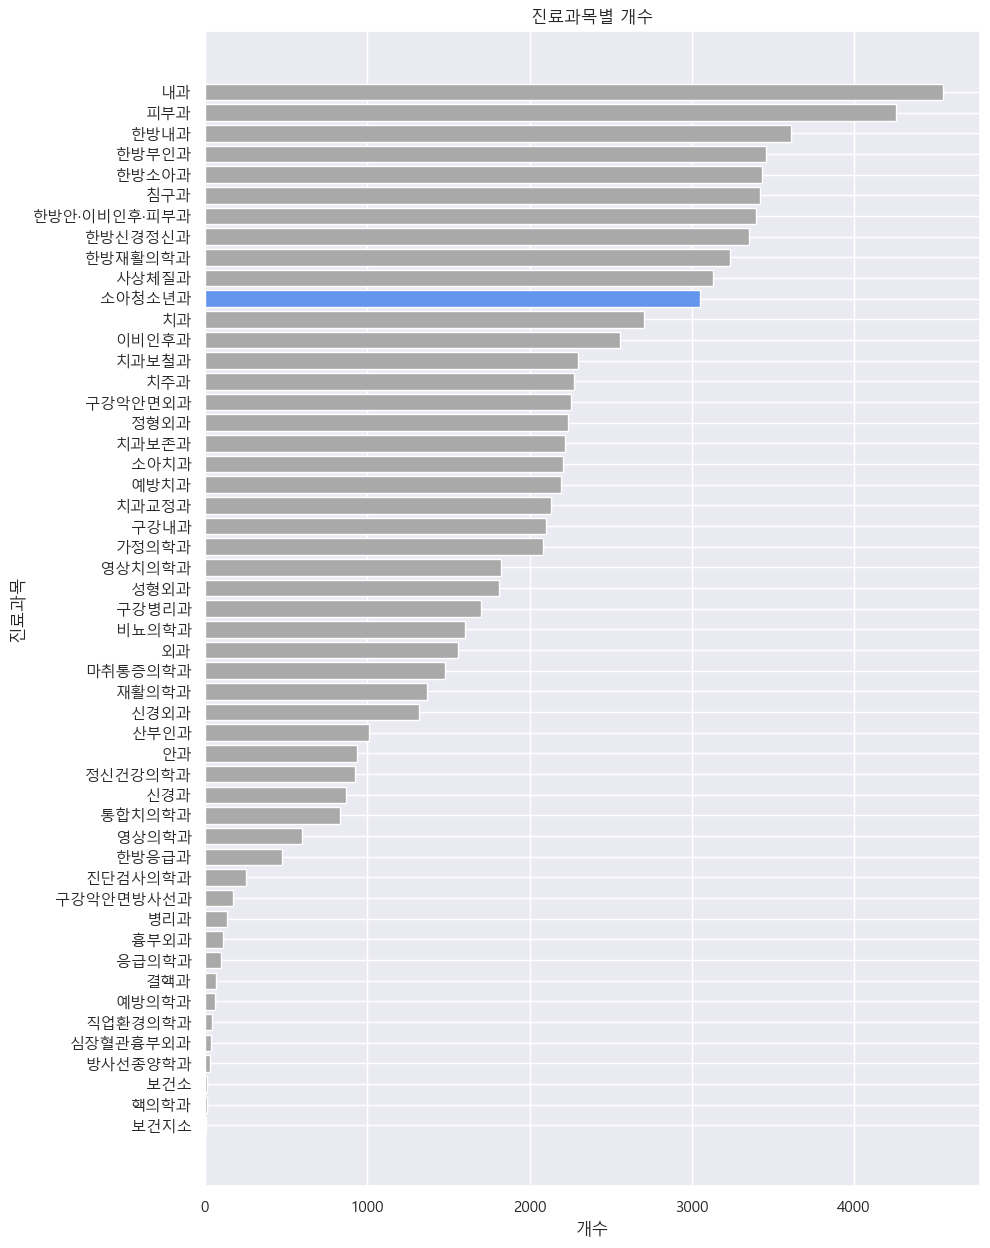

In [37]:
departments = clinic['진료과목내용명'].str.split(', ', expand=True).stack()
departments.reset_index(drop=True, inplace=True)

counts = departments.value_counts().sort_values(ascending=True)

colors = ['darkgray' if dep != '소아청소년과' else 'cornflowerblue' for dep in counts.index]

plt.figure(figsize=(10, 15))  # 세로 막대로 변경

plt.barh(counts.index, counts, color=colors)  # barh를 사용하여 세로 막대 그리기
plt.title('진료과목별 개수')
plt.xlabel('개수')
plt.ylabel('진료과목')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_28844\216856614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm10_2021_seoul.drop(['구분(1)', '구분(2)', '구분(3)'], axis=1, inplace=True)


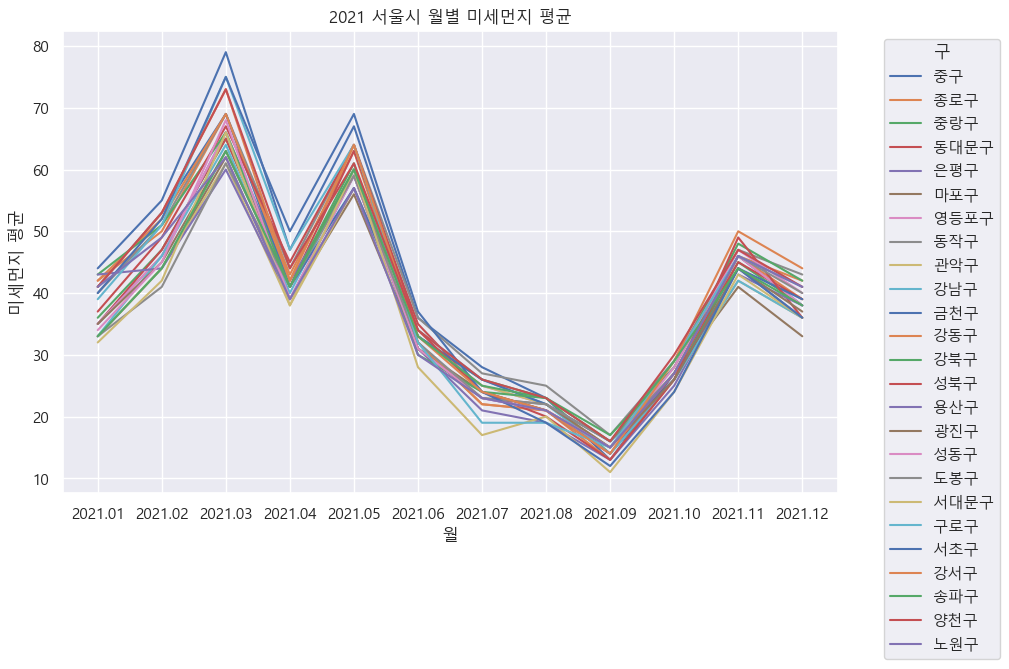

In [39]:
pm10_2021 = pd.read_csv('미세먼지_PM10__월별_대기오염도_2021.csv')
pm10_2021_seoul = pm10_2021[(pm10_2021['구분(1)'] == '도시대기') & (pm10_2021['구분(2)'] == '서울')]
pm10_2021_seoul.drop(['구분(1)', '구분(2)', '구분(3)'], axis=1, inplace=True)
pm10_2021_seoul.set_index('구분(4)', inplace=True)
pm10_2021_seoul = pm10_2021_seoul.apply(pd.to_numeric, errors='coerce')

# Line plot으로 시각화
ax = pm10_2021_seoul.T.plot(kind='line', figsize=(10, 6))
ax.set_xticks(range(len(pm10_2021_seoul.columns)))
ax.set_xticklabels(pm10_2021_seoul.columns)
plt.xlabel('월')
plt.ylabel('미세먼지 평균')
plt.title('2021 서울시 월별 미세먼지 평균')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Hypothesis testing
## H0: 서울시 지역별 미세먼지와 소아청소년과 병원 수는 상관관계가 없다
## H1: 서울시 지역별 미세먼지와 소아청소년과 병원 수는 상관관계가 있다

In [19]:
from scipy.stats import spearmanr

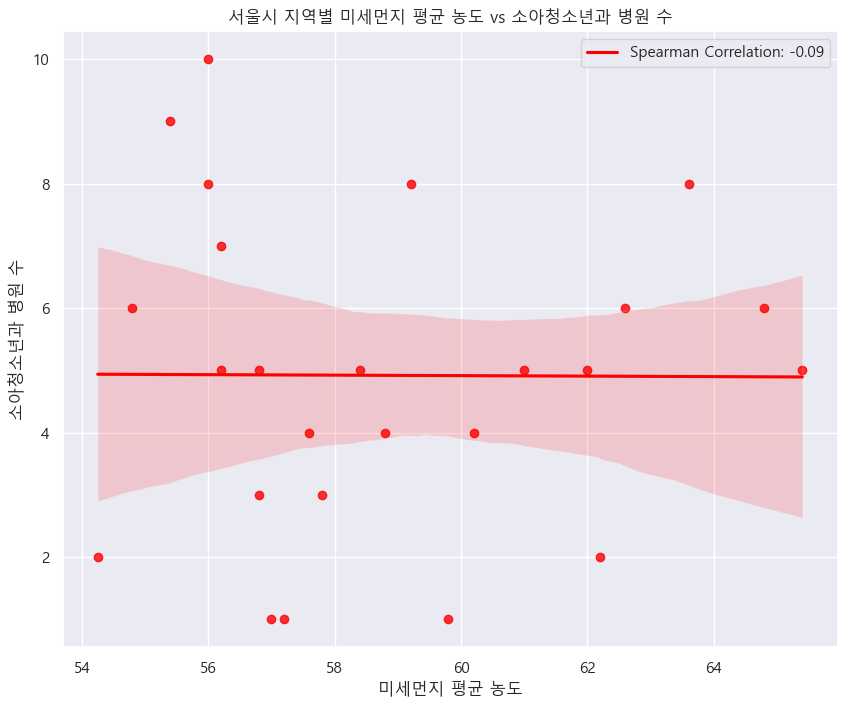

In [28]:
df = pd.read_csv('medical-facility-location.csv')
x = df['평균 미세먼지 농도']
y = df['소아청소년과 병원 수']

correlation, _ = spearmanr(x, y)
plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, color='red', scatter_kws={'color': 'red'}, line_kws={'label': f'Spearman Correlation: {correlation:.2f}'})
plt.title('서울시 지역별 미세먼지 평균 농도 vs 소아청소년과 병원 수')
plt.xlabel('미세먼지 평균 농도')
plt.ylabel('소아청소년과 병원 수')
plt.legend()
plt.show()

<Axes: >

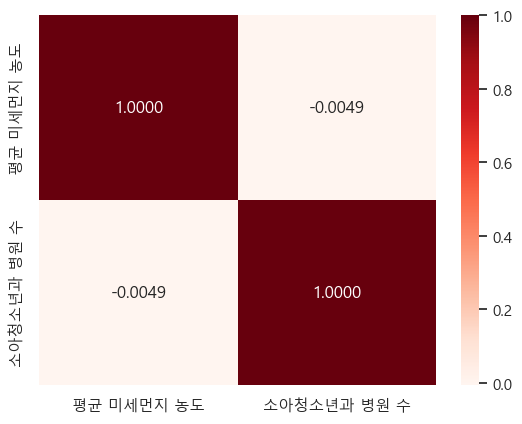

In [23]:
sns.heatmap(df[['평균 미세먼지 농도', '소아청소년과 병원 수']].corr(), annot=True, cmap='Reds', fmt='.4f')

In [24]:
print(stats.spearmanr(df['평균 미세먼지 농도'], df['소아청소년과 병원 수']))

SignificanceResult(statistic=-0.08884556573106817, pvalue=0.6727900688799668)


# Hypothesis testing
## H0: 서울시 지역별 미세먼지와 소아청소년과 의원 수는 상관관계가 없다
## H1: 서울시 지역별 미세먼지와 소아청소년과 의원 수는 상관관계가 있다

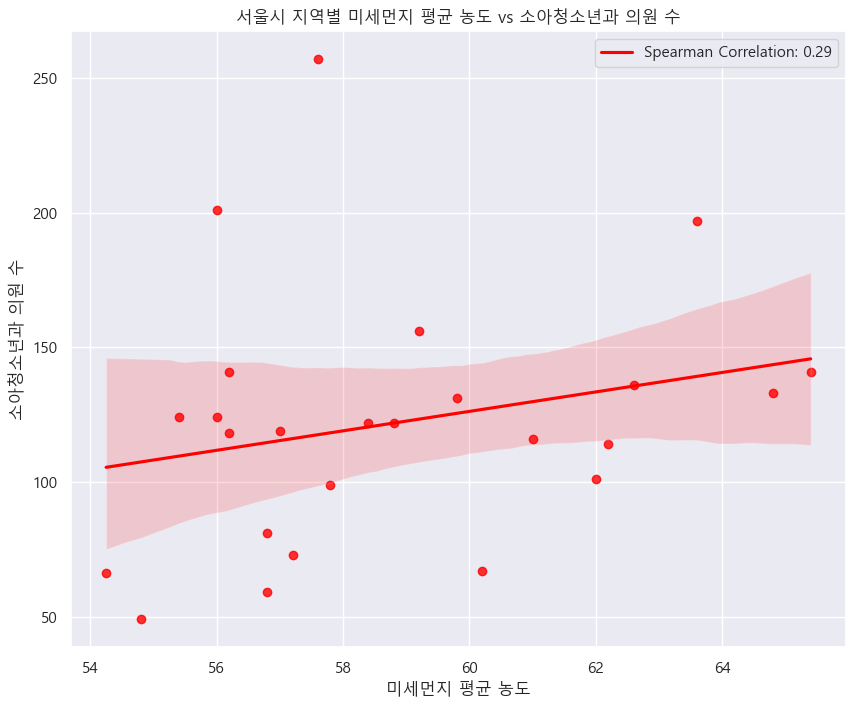

In [29]:
x = df['평균 미세먼지 농도']
y = df['소아청소년과 의원 수']

correlation, _ = spearmanr(x, y)
plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, color='red', scatter_kws={'color': 'red'}, line_kws={'label': f'Spearman Correlation: {correlation:.2f}'})
plt.title('서울시 지역별 미세먼지 평균 농도 vs 소아청소년과 의원 수')
plt.xlabel('미세먼지 평균 농도')
plt.ylabel('소아청소년과 의원 수')
plt.legend()
plt.show()

<Axes: >

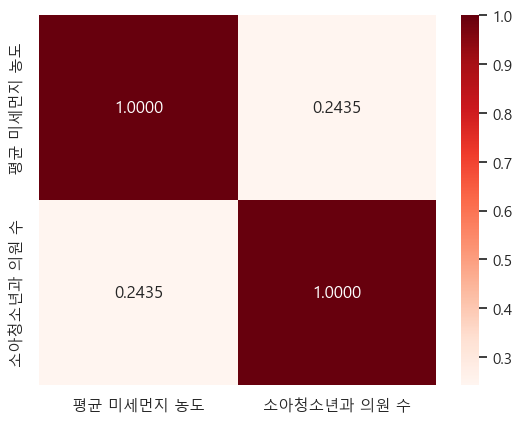

In [59]:
sns.heatmap(df[['평균 미세먼지 농도', '소아청소년과 의원 수']].corr(), annot=True, cmap='Reds', fmt='.4f')

In [27]:
print(stats.spearmanr(df['평균 미세먼지 농도'], df['소아청소년과 의원 수']))

SignificanceResult(statistic=0.29110512129380056, pvalue=0.15800863515745628)
